#  Deep Learning - CNN Case Study

## Reconsidering  image datasets

## 1. Import required packages

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist, cifar10, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
%matplotlib inline

## 2. Load dataset

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# input image dimensions
n_channels = 1 if len(x_train.shape) < 4 else x_train.shape[3]
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_rows, img_cols)
    input_shape = (n_channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, n_channels)
    input_shape = (img_rows, img_cols, n_channels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 3. Analyze and process dataset

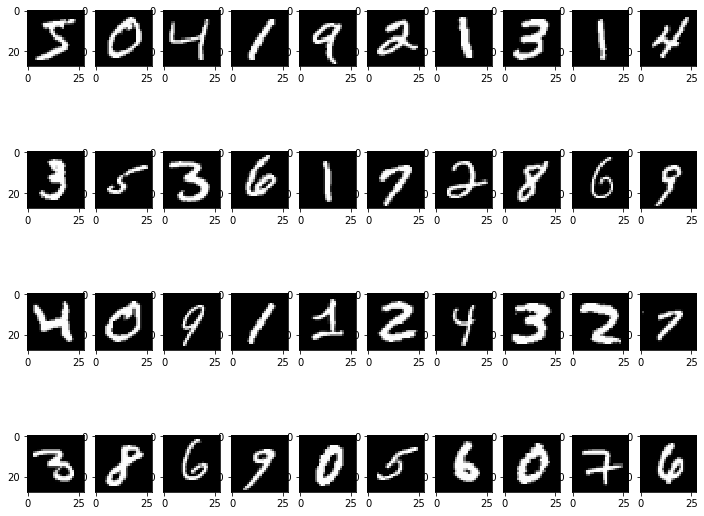

In [4]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(np.squeeze(x_train[i,:,:,:]),interpolation='nearest',cmap='gray')
plt.show()

### Preprocess target/label vectors

In [5]:
# convert class vectors to binary class matrices
num_classes = 10
y_tsne = y_train
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 4. Split into train and test set

### Already done during loading

## 5. Choose classifier method and fit on data 

### Set parameters for deep learning training

In [30]:
batch_size = 128
epochs = 5

### Define CNN architecture
_______________
### <span style="color:blue">**TODO: Play with `kernel_sizes` or `activation`. Add more Conv2D and MaxPooling layers or Dense layers at the end!**</span>

In [31]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        # do not change the lines below
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                72010     
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________


### Train model

In [37]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 34s 91ms/step - loss: 1.0562 - accuracy: 0.6315 - val_loss: 1.0480 - val_accuracy: 0.6410
Epoch 2/15
352/352 [==============================] - 26s 74ms/step - loss: 1.0501 - accuracy: 0.6350 - val_loss: 1.0272 - val_accuracy: 0.6540
Epoch 3/15
352/352 [==============================] - 28s 79ms/step - loss: 1.0344 - accuracy: 0.6407 - val_loss: 1.0287 - val_accuracy: 0.6528
Epoch 4/15
352/352 [==============================] - 36s 102ms/step - loss: 1.0244 - accuracy: 0.6430 - val_loss: 1.0355 - val_accuracy: 0.6476
Epoch 5/15
352/352 [==============================] - 33s 94ms/step - loss: 1.0190 - accuracy: 0.6502 - val_loss: 1.0282 - val_accuracy: 0.6562
Epoch 6/15
352/352 [==============================] - 32s 91ms/step - loss: 1.0231 - accuracy: 0.6453 - val_loss: 1.0252 - val_accuracy: 0.6474
Epoch 7/15
352/352 [==============================] - 28s 79ms/step - loss: 1.0115 - accuracy: 0.6495 - val_loss: 1.0206 - val_accuracy

## 6. Use trained model to predict labels for train and test set

In [33]:
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Test loss: ', test_score[0])
print('Train accuracy:', train_score[1])
print('Test accuracy: ', test_score[1])

Train loss: 0.9653394818305969
Test loss:  1.0861856937408447
Train accuracy: 0.6735399961471558
Test accuracy:  0.6245999932289124


### Analyze development of key metrics during training

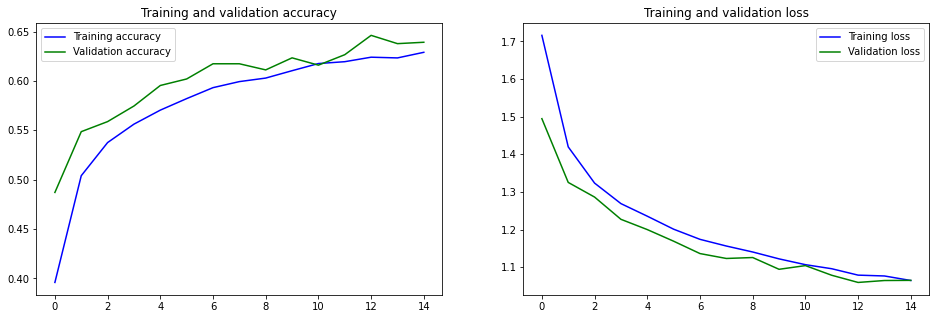

In [34]:
#print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

[[677  26 119  23  17   6  16  13  69  34]
 [ 43 754  32  12   9  11  11  14  31  83]
 [ 68   6 599  49  78  74  80  33   9   4]
 [  9  12 147 411  87 190  93  27  12  12]
 [ 26   1 210  56 503  47  93  50  11   3]
 [ 11   2 142 141  58 558  40  41   6   1]
 [  3   3 100  52  32  27 772   7   4   0]
 [ 16   4  82  47  78  89  12 662   1   9]
 [125  59  36  18   9  15  19   7 678  34]
 [ 64 131  30  25  16  17  19  31  35 632]]


### For MNIST only: Try own handwriting

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 1-( 0.2989 * r + 0.5870 * g + 0.1140 * b)
    gray = gray/np.max(gray)
    return gray

In [ ]:
folder = 'data/digits/'
imgfile = '6.png'
img = rgb2gray(mpimg.imread(folder + imgfile))
img = np.reshape(img,(1,28,28,1))
ynew = np.argmax(model.predict(img), axis=-1)
p = model.predict(img)

The predicted digit class is: 6


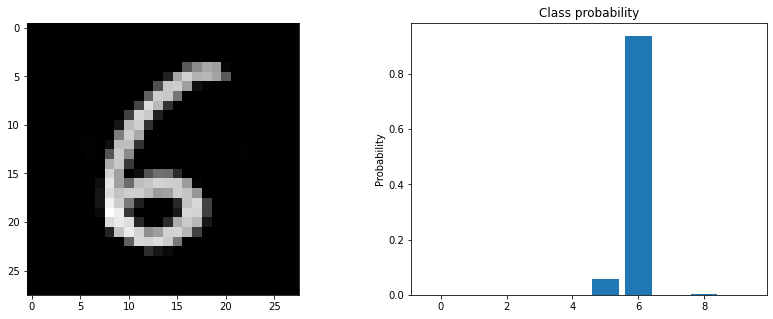

In [15]:
print(f"The predicted digit class is: {int(ynew)}")
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.imshow(np.reshape(img,(28,28)), cmap='gray', vmin=0, vmax=1);
plt.subplot(1, 2, 2)
plt.bar(list(range(0,10)),np.reshape(p,(10,)));
plt.ylabel('Probability');
plt.title('Class probability');

# Visualizing the situation

In [16]:
import plotly.express as px

In [17]:
x_tsne = np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[1]))
x_tsne.shape

(60000, 784)

In [18]:
from sklearn.manifold import TSNE

In [19]:
n_samples = 5000
p = np.random.randint(low=0,high=10000,size=n_samples)

In [20]:
x_tsne = x_tsne[p,:]
y_tsne = y_tsne[p]

In [21]:
y_tsne.shape

(5000,)

In [22]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=10000)
tsne_results = tsne.fit_transform(x_tsne)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.005s...
[t-SNE] Computed neighbors for 5000 samples in 1.635s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.571883
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.766083


KeyboardInterrupt: 

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(tsne_results,columns = ['x','y','z'])
df['y_tsne'] = y_tsne

In [ ]:
df.head()

In [ ]:
fig = px.scatter_3d(df, x='x', y='y', z='z', opacity=0.8,
              color='y_tsne')
fig.show()

In [ ]:
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=10000)
#tsne_results = tsne.fit_transform(x_tsne)
#df = pd.DataFrame(tsne_results,columns = ['x','y'])
#df['y_tsne'] = y_tsne

In [ ]:
#fig = px.scatter(df, x='x', y='y', opacity=0.8, color='y_tsne')
#fig.show()